## Import

In [1]:
!pip install keras-cv
!pip install -q -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 4.9 MB/s 
     |████████████████████████████████| 135 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 48.1 MB/s 


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import matplotlib.pyplot as plt

## Load and Pre-process Data

In [3]:
(img_train, label_train), (img_test, label_test) = keras.datasets.cifar10.load_data()
img_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

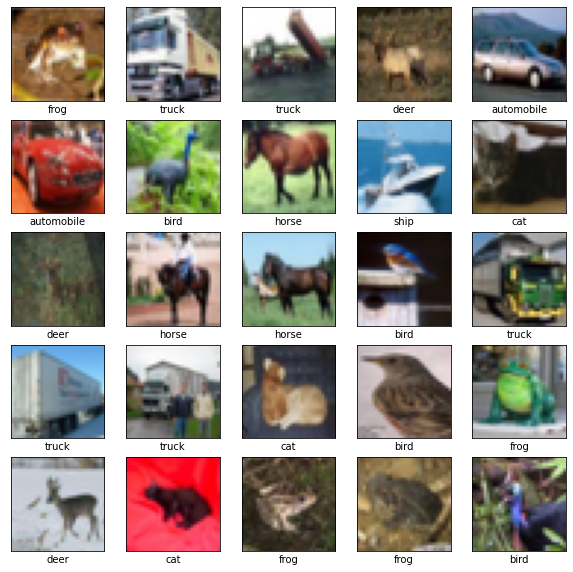

In [4]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[label_train[i][0]])

plt.show()

In [5]:
# Converting the pixels data to float type and Standardizing (255 is the total number of pixels an image can have)
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

# One hot encoding the target class (labels)
num_classes = 10
label_train = tf.keras.utils.to_categorical(label_train, num_classes)
label_test = tf.keras.utils.to_categorical(label_test, num_classes)

## Base model

In [6]:
def model_builder():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

In [8]:
model = model_builder()
history = model.fit(img_train, label_train, batch_size=64, epochs=30,
                    validation_data=(img_test, label_test))

Epoch 1/30
782/782 [==============================] - 8s 9ms/step - loss: 1.6210 - accuracy: 0.4080 - val_loss: 1.9682 - val_accuracy: 0.4083
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2120 - accuracy: 0.5647 - val_loss: 3.0011 - val_accuracy: 0.1816
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.0938 - accuracy: 0.6107 - val_loss: 1.3347 - val_accuracy: 0.5480
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 1.0244 - accuracy: 0.6399 - val_loss: 1.0764 - val_accuracy: 0.6154
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 0.9776 - accuracy: 0.6549 - val_loss: 1.1006 - val_accuracy: 0.6194
Epoch 6/30
782/782 [==============================] - 7s 9ms/step - loss: 0.9351 - accuracy: 0.6707 - val_loss: 1.2633 - val_accuracy: 0.5546
Epoch 7/30
782/782 [==============================] - 7s 9ms/step - loss: 0.9078 - accuracy: 0.6814 - val_loss: 0.8694 - val_accuracy: 0.6917
Epoch 

## Keras Tuner

## Train best model

## Evaluate best model

## Analyse with Confusion Matrix